In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Configurations
file_path='C:\\Users\\OEM\\Desktop\\\DS_TLC\\DS videos\\uber assignment\\Bank_Personal_Loan_Modelling.xlsx'
sheet='Data'
col_list=['ID','Age','Experience','Income','ZIP Code','Family','CCAvg','Education','Mortgage','Personal Loan','Securities Account','CD Account', 'Online', 'CreditCard']
Age_range=[(26,30),(31,35),(36,40),(41,50),(51,60),(61,65)]
Income_range=[(60,75),(80,100),(101,125),(126,150),(151,180),(181,224)]
CCAvg_range=[(0,1),(1.1,5),(5.1,8),(8.1,10)]
Mortgage_range=[(0,1),(2,100),(101,200),(201,300),(301,400),(401,500),(501,600),(601,700)]
#stage2
condition1='Family>2 & Income > 151 & CCAvg > 5.1'
condition2='Family>2 & Income > 101 & CCAvg > 5.1'
condition3='Family>2 & Income > 101 & CCAvg > 3.1'
condition4='Family>1 & Income > 101 & CCAvg > 3.1'
condition5='Family>2 & Income > 101 & CCAvg > 2.1'
condition6='Family>2 & Income > 101 & CCAvg > 2.1 & Education >2'
condition7='Family>2 & Income > 101 & CCAvg > 2.1 & CD Account=1'
condition8='Family>2 & Income > 101 & CCAvg > 2.1 & Education >2 & CD Account=1'


In [3]:
#Read the data from excel
Customers_df=pd.read_excel(file_path,sheet_name=sheet)
Customers_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


# Step1 Data Mining

In [4]:
#Method to group columns based on ploan and find count and average
def Calculate_Average(df,colname):
    temp=df.pivot_table(index=colname,columns=col_list[9],aggfunc='count').iloc[:,:2]
    temp.columns=temp.columns.droplevel(0)
    temp=temp.reset_index().rename_axis(None,axis=1)
    temp = temp.rename(columns={0:'ploan = 0',   #renaming the columns 
                            1:'ploan = 1'})
    temp['Ratio of conversion']=temp['ploan = 1']/(temp['ploan = 0']+temp['ploan = 1'])*100
    return temp

# Analyzing the Age column wrt ploan

In [5]:
#Creating new data frame for analyzing age data
Customers_df_Age=Customers_df.copy()
len(Customers_df_Age)

5000

In [6]:
#binning the Age column to different categories
Customers_df_Age[col_list[1]] = pd.cut(Customers_df_Age[col_list[1]],bins=pd.IntervalIndex.from_tuples(Age_range,closed='both'))

In [7]:
Customers_df_Age=Customers_df_Age.dropna() #drop coulmns not in categoy range
Age_Calc=Calculate_Average(Customers_df_Age,col_list[1]) #call function to calculate count and % wrt ploan
print(Age_Calc)

        Age  ploan = 0  ploan = 1  Ratio of conversion
0  [26, 30]        465         66            12.429379
1  [31, 35]        582         68            10.461538
2  [36, 40]        536         50             8.532423
3  [41, 50]       1148        122             9.606299
4  [51, 60]       1208        115             8.692366
5  [61, 65]        452         59            11.545988


,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1,2,"[41, 50]",19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,"[36, 40]",15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,"[31, 35]",9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,"[31, 35]",8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,"[36, 40]",13,29,92121,4,0.4,2,155,0,0,0,1,0


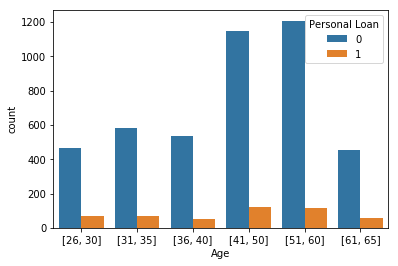

In [8]:
#Visualizing Age data wrt ploan
#bins=[25,30,35,40,45,50,55,60,65]
#plt.hist(Customers_df.Age,bins,edgecolor = 'black')
#plt.show()
sns.countplot(Customers_df_Age.Age, hue=Customers_df_Age[col_list[9]])
Customers_df_Age.head()

We can observe that in all age groups around 10 percent of people have opted for ploan.
People with ploan are not confined to any particular age group in the dataset.

# Analyze Income data wrt ploan

In [9]:
#Creating new data frame for analyzing Income data
Customers_df_Income=Customers_df.copy()
len(Customers_df_Income)

5000

In [10]:
#binning the Income column to different categories
Customers_df_Income[col_list[3]] = pd.cut(Customers_df_Income[col_list[3]],bins=pd.IntervalIndex.from_tuples(Income_range,closed='both'))
Customers_df_Income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                2606 non-null category
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), float64(1), int64(12)
memory usage: 512.9 KB


In [11]:
Customers_df_Income=Customers_df_Income.dropna() #drop coulmns not in categoy range
Income_Calc=Calculate_Average(Customers_df_Income,col_list[3]) #call function to calculate count and % wrt ploan
print(Income_Calc)

       Income  ploan = 0  ploan = 1  Ratio of conversion
0    [60, 75]        671          7             1.032448
1   [80, 100]        681         35             4.888268
2  [101, 125]        339        102            23.129252
3  [126, 150]        211        118            35.866261
4  [151, 180]        152        140            47.945205
5  [181, 224]         72         78            52.000000


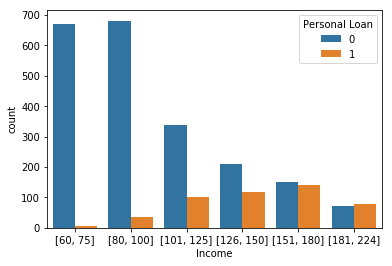

In [12]:

sns.countplot(Customers_df_Income[col_list[3]], hue=Customers_df_Income[col_list[9]])


Proportion of people opting for ploan with income greater than 100 is high.
Income has high impact with ploan.

# Analyze CCAvg data wrt ploan

In [13]:
#Creating new data frame for analyzing CCAvg data
Customers_df_CCAvg=Customers_df.copy()
len(Customers_df_CCAvg)

5000

In [14]:
#binning the CCAvg column to different categories
Customers_df_CCAvg[col_list[6]] = pd.cut(Customers_df_CCAvg[col_list[6]],bins=pd.IntervalIndex.from_tuples(CCAvg_range,closed='both'))
Customers_df_CCAvg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null category
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: category(1), int64(13)
memory usage: 512.8 KB


In [15]:
Customers_df_CCAvg=Customers_df_CCAvg.dropna() #drop coulmns not in categoy range
CCAvg_Calc=Calculate_Average(Customers_df_CCAvg,col_list[6]) #call function to calculate count and % wrt ploan
print(CCAvg_Calc)

         CCAvg  ploan = 0  ploan = 1  Ratio of conversion
0   [0.0, 1.0]       1865         49             2.560084
1   [1.1, 5.0]       2447        293            10.693431
2   [5.1, 8.0]        183        124            40.390879
3  [8.1, 10.0]         25         14            35.897436


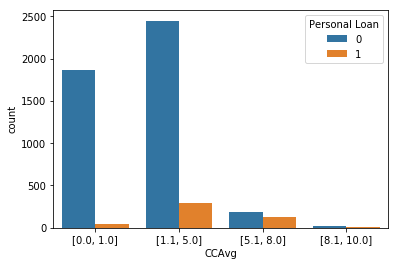

In [16]:
sns.countplot(Customers_df_CCAvg[col_list[6]], hue=Customers_df_CCAvg[col_list[9]])

Proportion of people opting for ploan with CCAvg greater than 5 is high.
CCAvg also has some impact with ploan.

# Analyze Mortgage data wrt ploan

In [17]:
#Creating new data frame for analyzing Mortgage data
Customers_df_Mortgage=Customers_df.copy()
len(Customers_df_Mortgage)

5000

In [18]:
#binning the Mortgage column to different categories
Customers_df_Mortgage[col_list[8]] = pd.cut(Customers_df_Mortgage[col_list[8]],bins=pd.IntervalIndex.from_tuples(Mortgage_range,closed='both'))
Customers_df_Mortgage.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,"[0, 1]",0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,"[0, 1]",0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,"[0, 1]",0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,"[0, 1]",0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,"[0, 1]",0,0,0,0,1


In [19]:
Customers_df_Mortgage=Customers_df_Mortgage.dropna() #drop coulmns not in categoy range
Morgage_Calc=Calculate_Average(Customers_df_Mortgage,col_list[8]) #call function to calculate count and % wrt ploan
print(Morgage_Calc)

     Mortgage  ploan = 0  ploan = 1  Ratio of conversion
0      [0, 1]       3150        312             9.012132
1    [2, 100]        269         13             4.609929
2  [101, 200]        719         39             5.145119
3  [201, 300]        257         40            13.468013
4  [301, 400]         88         40            31.250000
5  [401, 500]         28         20            41.666667
6  [501, 600]          7         14            66.666667
7  [601, 700]          2          2            50.000000


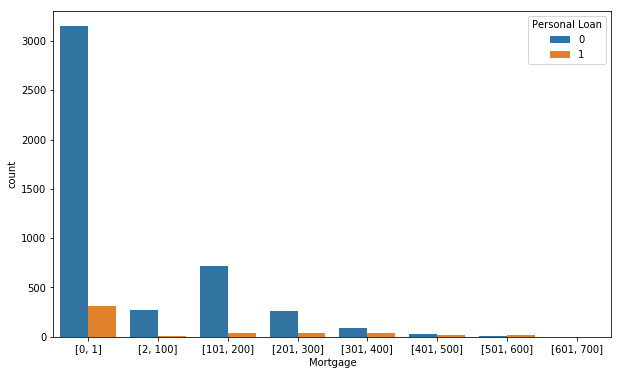

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(Customers_df_Mortgage[col_list[8]], hue=Customers_df_Mortgage[col_list[9]])

Proportion of people with mortgage greater than 300 are likely to opt for ploan.
But as the numbers are very low in that range the effect of mortgage is negligent.

# Analyze zip code data wrt ploan

In [21]:
#Creating new data frame for analyzing zip code data
Customers_df_Zip=Customers_df.copy()
len(Customers_df_Zip)

5000

In [22]:
#Taking first two digits of zip code
Customers_df_Zip[col_list[4]] = Customers_df_Zip[col_list[4]].astype(str).str[:2]
Customers_df_Zip[col_list[4]] =Customers_df_Zip[col_list[4]].astype(int)
Customers_df_Zip[col_list[4]].unique()


array([91, 90, 94, 92, 93, 95, 96], dtype=int64)

In [23]:
Customers_df_Zip=Customers_df_Zip.dropna() #drop coulmns not in categoy range
Zip_Calc=Calculate_Average(Customers_df_Zip,col_list[4]) #call function to calculate count and % wrt ploan
print(Zip_Calc)

   ZIP Code  ploan = 0  ploan = 1  Ratio of conversion
0        90        636         67             9.530583
1        91        510         55             9.734513
2        92        894         94             9.514170
3        93        374         43            10.311751
4        94       1334        138             9.375000
5        95        735         80             9.815951
6        96         37          3             7.500000


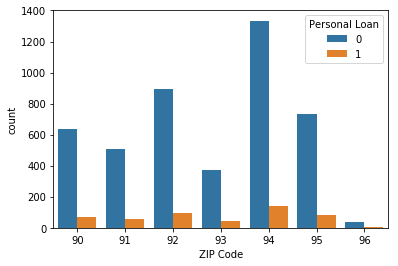

In [24]:
sns.countplot(Customers_df_Zip[col_list[4]], hue=Customers_df_Zip[col_list[9]])

Like age column , We can observe that in all zip code around less than 10 percent of people have opted for ploan in each category.
People with ploan are not confined to any particular zip code in the dataset.


# Analyze family count wrt ploan

In [25]:
#Creating new data frame for analyzing family count data
Customers_df_family=Customers_df.copy()
len(Customers_df_family)

5000

In [26]:
#selecting specific family count data
Customers_df_family = Customers_df_family[(Customers_df_family[col_list[5]] == 1) |(Customers_df_family[col_list[5]] == 2)|(Customers_df_family[col_list[5]] == 3)|(Customers_df_family[col_list[5]] == 4)]
Customers_df_family.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


   Family  ploan = 0  ploan = 1  Ratio of conversion
0       1       1365        107             7.269022
1       2       1190        106             8.179012
2       3        877        133            13.168317
3       4       1088        134            10.965630


([<matplotlib.patches.Wedge at 0x23845f98f98>,
 [Text(1.0997871140589945, 0.021640326933491244, '[60, 75]'),
  Text(1.090358294815169, 0.14532305022864367, '[80, 100]'),
  Text(0.864657403922107, 0.6799761568192537, '[101, 125]'),
  Text(-0.23985894096091703, 1.073530478580421, '[126, 150]'),
  Text(-1.0668485906234684, -0.26801881404990835, '[151, 180]'),
  Text(0.6027218037985902, -0.9201773889994114, '[181, 224]')])

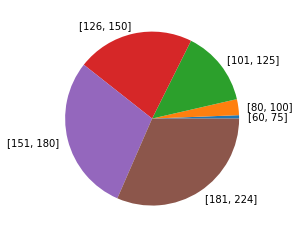

In [78]:
Customers_df_family=Customers_df_family.dropna() #drop coulmns not in categoy range
family_Calc=Calculate_Average(Customers_df_family,col_list[5]) #call function to calculate count and % wrt ploan
print(family_Calc)
plt.pie(Income_Calc.iloc[:,3],labels=Income_Calc.iloc[:,0])


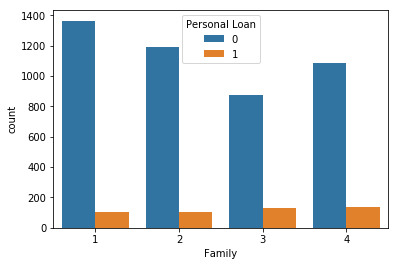

In [28]:
sns.countplot(Customers_df_family[col_list[5]], hue=Customers_df_family[col_list[9]])

We can observe that larger proportion of people have opted for ploan in Family 3 and 4 category.
Family count has a slight impact on ploan.

# Analyze CreditCard data wrt ploan

In [29]:
#Creating new data frame for analyzing CreditCard data
Customers_df_CreditCard=Customers_df.copy()
len(Customers_df_CreditCard)

5000

In [30]:
#selecting specific CreditCard data
Customers_df_CreditCard = Customers_df_CreditCard[(Customers_df_CreditCard[col_list[13]] == 0) |(Customers_df_family[col_list[13]] == 1)]
Customers_df_CreditCard.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [31]:
Customers_df_CreditCard=Customers_df_CreditCard.dropna() #drop coulmns not in categoy range
CreditCard_Calc=Calculate_Average(Customers_df_CreditCard,col_list[13]) #call function to calculate count and % wrt ploan
print(CreditCard_Calc)

   CreditCard  ploan = 0  ploan = 1  Ratio of conversion
0           0       3193        337             9.546742
1           1       1327        143             9.727891


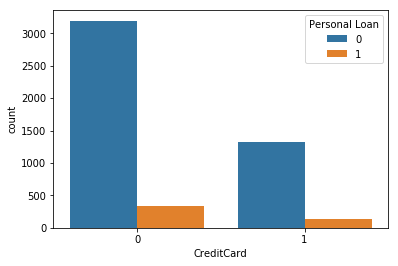

In [32]:
sns.countplot(Customers_df_CreditCard[col_list[13]], hue=Customers_df_CreditCard[col_list[9]])

Both 0 and 1 creditcard categories have less proportion of people opting for ploan.
Creditcard does not have much impact on ploan.

# Analyze Education data wrt ploan

In [33]:
#Creating new data frame for analyzing Education data
Customers_df_Education=Customers_df.copy()
len(Customers_df_Education)

5000

In [34]:
#selecting specific Education data
Customers_df_Education = Customers_df_Education[(Customers_df_Education[col_list[7]] == 1) |(Customers_df_Education[col_list[7]] == 2)|(Customers_df_Education[col_list[7]] == 3)]
Customers_df_Education.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [35]:
Customers_df_Education=Customers_df_Education.dropna() #drop coulmns not in categoy range
Education_Calc=Calculate_Average(Customers_df_Education,col_list[7]) #call function to calculate count and % wrt ploan
print(Education_Calc)

   Education  ploan = 0  ploan = 1  Ratio of conversion
0          1       2003         93             4.437023
1          2       1221        182            12.972202
2          3       1296        205            13.657562


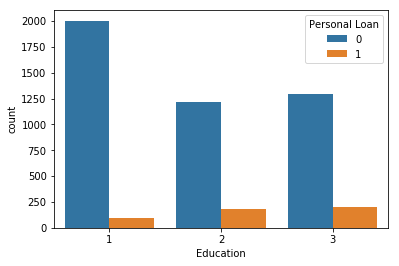

In [36]:
sns.countplot(Customers_df_Education[col_list[7]], hue=Customers_df_Education[col_list[9]])

Education 2 and 3 categories have larger proportion of people opting for ploan.
Education has a little impact on ploan.

# Analyze Securities data wrt ploan

In [37]:
#Creating new data frame for analyzing Securities data
Customers_df_Securities=Customers_df.copy()
len(Customers_df_Securities)

5000

In [38]:
#selecting specific Securities data
Customers_df_Securities = Customers_df_Securities[(Customers_df_Securities[col_list[10]] == 0) |(Customers_df_Securities[col_list[10]] == 1)]
Customers_df_Securities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [39]:
Customers_df_Securities=Customers_df_Securities.dropna() #drop coulmns not in categoy range
Securities_Calc=Calculate_Average(Customers_df_Securities,col_list[10]) #call function to calculate count and % wrt ploan
print(Securities_Calc)

   Securities Account  ploan = 0  ploan = 1  Ratio of conversion
0                   0       4058        420             9.379187
1                   1        462         60            11.494253


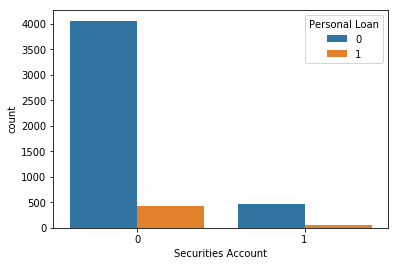

In [40]:
sns.countplot(Customers_df_Securities[col_list[10]], hue=Customers_df_Securities[col_list[9]])

In Securities Account, both 0 and 1 categories have very less proportion of people opting for ploan.
Securities Account has negligible impact on ploan.

# Analyze CDAccount data wrt ploan

In [41]:
#Creating new data frame for analyzing CDAccount data
Customers_df_CDAccount=Customers_df.copy()
len(Customers_df_CDAccount)

5000

In [42]:
#selecting specific CDAccount data
Customers_df_CDAccount = Customers_df_CDAccount[(Customers_df_CDAccount[col_list[11]] == 0) |(Customers_df_CDAccount[col_list[11]] == 1)]
Customers_df_CDAccount.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [43]:
Customers_df_CDAccount=Customers_df_CDAccount.dropna() #drop coulmns not in categoy range
CDAccount_Calc=Calculate_Average(Customers_df_CDAccount,col_list[11]) #call function to calculate count and % wrt ploan
print(CDAccount_Calc)

   CD Account  ploan = 0  ploan = 1  Ratio of conversion
0           0       4358        340             7.237122
1           1        162        140            46.357616


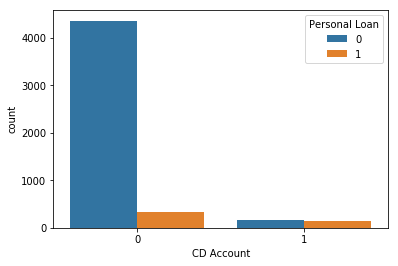

In [44]:
sns.countplot(Customers_df_Securities[col_list[11]], hue=Customers_df_Securities[col_list[9]])

Almost all people in CDAccount 1 category have opted for ploan.
CDAccount has a significant impact on ploan.

# Analyze online data wrt ploan

In [45]:
#Creating new data frame for analyzing Online data
Customers_df_Online=Customers_df.copy()
len(Customers_df_Online)

5000

In [46]:
#selecting specific Online data
Customers_df_Online = Customers_df_Online[(Customers_df_Online[col_list[12]] == 0) |(Customers_df_Online[col_list[12]] == 1)]
Customers_df_Online.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 585.9 KB


In [47]:
Customers_df_Online=Customers_df_Online.dropna() #drop coulmns not in categoy range
Online_Calc=Calculate_Average(Customers_df_Online,col_list[12]) #call function to calculate count and % wrt ploan
print(Online_Calc)

   Online  ploan = 0  ploan = 1  Ratio of conversion
0       0       1827        189             9.375000
1       1       2693        291             9.752011


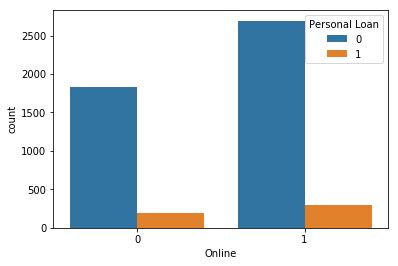

In [48]:
sns.countplot(Customers_df_Online[col_list[12]], hue=Customers_df_Online[col_list[9]])

Both 0 and 1 online categories have very less proportion of people opting for ploan.
Online doesn't have any significant impact on ploan.

# Stage2_dataMining

In [49]:
#Customers_df=pd.read_excel('C:\\Users\\OEM\\Desktop\\DS videos\\uber assignment\\Bank_Personal_Loan_Modelling.xlsx',sheet_name='Data')
Customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [50]:
#Function to build second stage data
def extract_data(df,condition):
    temp=df.pivot_table(columns=col_list[9],aggfunc='count')
    temp=temp.reset_index().rename_axis(None,axis=1)
    temp=temp.drop('index',axis=1)
    temp=temp.iloc[:1,:]
    if 1 not in temp.columns:
        temp[1]=0
    if 0 not in temp.columns:
        temp[0]=0
    temp = temp.rename(columns={0:'ploan = 0',   #renaming the columns 
                            1:'ploan = 1'})
    temp['Ratio of conversion']=temp['ploan = 1']/(temp['ploan = 0']+temp['ploan = 1'])*100
    temp['Condition']=condition
    return temp

In [51]:
#Function to create condition based on the requirement
def Create_condition(condition1):
    condition_sub=condition1.split('&')
    final_condition=''
    for i in range(0,len(condition_sub)):
        if('>' in condition_sub[i]):
            condition=condition_sub[i].split('>')
            str1='(df[\''+condition[0].strip()+'\']>'+condition[1].strip()+')'
        elif('<' in condition_sub[i]):
            condition=condition_sub[i].split('<')
            str1='(df[\''+condition[0].strip()+'\']<'+condition[1].strip()+')'
        else:
            condition=condition_sub[i].split('=')
            str1='(df[\''+condition[0].strip()+'\']=='+condition[1].strip()+')'
        if(i<=(len(condition_sub)-2)):
            str1=str1+'&'
        final_condition=final_condition + str1
    #print(final_condition)
    return final_condition     


In [52]:
df=Customers_df.copy()
#condition1
df_1=df[eval(Create_condition(condition1))]
final_value1=extract_data(df_1,condition1)

#condition2
df_2=df[eval(Create_condition(condition2))]
final_value2=extract_data(df_2,condition2)

#condition3
df_3=df[eval(Create_condition(condition3))]
final_value3=extract_data(df_3,condition3)

#condition4
df_4=df[eval(Create_condition(condition4))]
final_value4=extract_data(df_4,condition4)

#condition5
df_5=df[eval(Create_condition(condition5))]
final_value5=extract_data(df_5,condition5)

#condition6
df_6=df[eval(Create_condition(condition6))]
final_value6=extract_data(df_6,condition6)

#condition7
df_7=df[eval(Create_condition(condition7))]
final_value7=extract_data(df_7,condition7)

#condition8
df_8=df[eval(Create_condition(condition8))]
final_value8=extract_data(df_8,condition8)



In [53]:
final_value=final_value1.append([final_value2,final_value3,final_value4,final_value5,final_value6,final_value7,final_value8],sort=True)
#final_value=final_value.drop(final_value.iloc[:,:0])
final_value=final_value[['Condition','ploan = 0','ploan = 1','Ratio of conversion']]
final_value

,Condition,ploan = 0,ploan = 1,Ratio of conversion
0,Family>2 & Income > 151 & CCAvg > 5.1,0,48,100.000000
0,Family>2 & Income > 101 & CCAvg > 5.1,0,82,100.000000
0,Family>2 & Income > 101 & CCAvg > 3.1,8,153,95.031056
0,Family>1 & Income > 101 & CCAvg > 3.1,199,216,52.048193
0,Family>2 & Income > 101 & CCAvg > 2.1,24,187,88.625592
0,Family>2 & Income > 101 & CCAvg > 2.1 & Educat...,9,67,88.157895
0,Family>2 & Income > 101 & CCAvg > 2.1 & CD Acc...,0,55,100.000000
0,Family>2 & Income > 101 & CCAvg > 2.1 & Educat...,0,17,100.000000


In [54]:
#Filter values based on ploan-1 and Ratio of conversion
finaal_outcome=final_value[(final_value.iloc[:,2]>150)&(final_value.loc[:,'Ratio of conversion']>80)]
finaal_outcome=finaal_outcome.sort_values('Ratio of conversion',ascending=False)
finaal_outcome

,Condition,ploan = 0,ploan = 1,Ratio of conversion
0,Family>2 & Income > 101 & CCAvg > 3.1,8,153,95.031056
0,Family>2 & Income > 101 & CCAvg > 2.1,24,187,88.625592


In [55]:
#Write the final output to an excel file
writer = pd.ExcelWriter(r'C:\Users\OEM\Desktop\final.xlsx')
final_value.to_excel(writer,'Conditions',index = False, header=True)
finaal_outcome.to_excel(writer,'Result',index = False, header=True)
writer.save()

# Check for features which have effect on ploan.

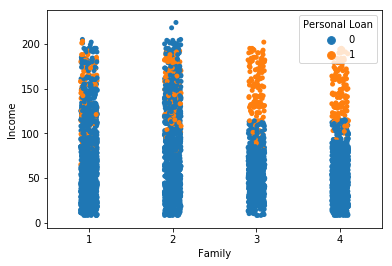

In [56]:
#Visualizations - Family and income wrt ploan
sns.stripplot(x=col_list[5] , y = col_list[3], hue=col_list[9],data = Customers_df)
#sns.barplot(x='Education' , y = 'Personal Loan', data = Customers_df)

We can strongly say that only people above 100 income range have opted for ploan.This is one strong feature for determining ploan.
Also,in family count 3 and 4 category, proportion of people who opted for loan is high. 
So, Income and family are strong parameters to determine ploan.
Income is sparsely distributed for all family range.There is no specific correlation found between Income and family count.

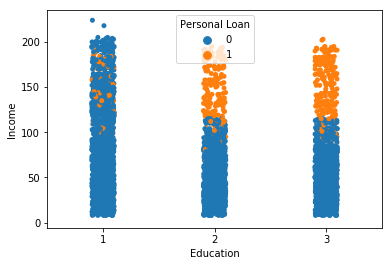

In [57]:
#Visualizations - Education and income wrt ploan
sns.stripplot(x=col_list[7] , y = col_list[3], hue=col_list[9],data = Customers_df)


Education 2 and 3 category has large proportion of people opting for ploan.
So,education is another important parameter for ploan.

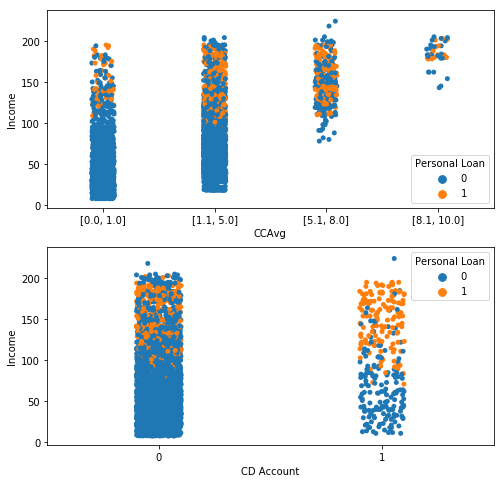

In [58]:
#Visualizations - CCAvg and CDAccount wrt ploan
plt.subplots(2,1 ,figsize = (8,8))
plt.subplot(211)
sns.stripplot(x=col_list[6] , y = col_list[3], hue=col_list[9],data = Customers_df_CCAvg)
plt.subplot(212)
sns.stripplot(x=col_list[11] , y = col_list[3], hue=col_list[9],data = Customers_df)

CCAvg greater than 5 has large proportion of people opting for ploan.
So CCAvg can be considered as a parameter to determine ploan.
CDAccount 1 has large proportion of people opting for ploan compared to CDAccount 0.
So CDAccount can be considered as a parameter to determine ploan.

# Check for other features which do not have much effect on ploan.

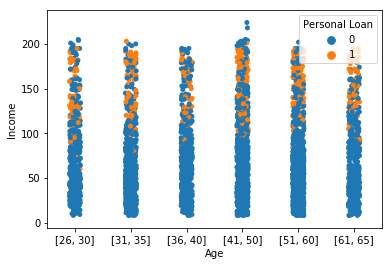

In [59]:
#visualizations-Age and Income column wrt ploan
sns.stripplot(x=col_list[1] , y = col_list[3],hue=col_list[9], data = Customers_df_Age)


Along the x-axis, we can see that the graph is almost the same for all age groups.So age doesnt have much effect on ploan.

# Visualizations to check correlation of independent features

Income,Family,Educaion,Age,CDAccount and CCAvg are the features identified as significant for ploan.
Checking the correlation between these features.

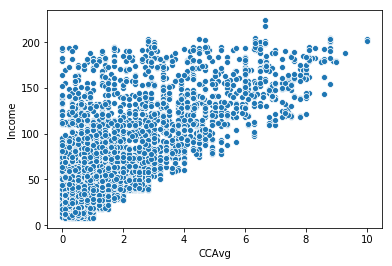

In [60]:
#visualizations-correlation between Income and CCAvg
sns.scatterplot(x=col_list[6], y =col_list[3] ,data = Customers_df)
#sns.stripplot(x=col_list[6], y =col_list[3] ,data = Customers_df)

Data is clustered in one part of the graph.People with CCAvg greater than 6 are in the above 100 income range.There is a slight positive correlation between income and ccavg. 

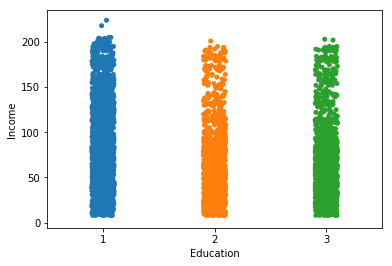

In [61]:
#visualizations-correlation between Income and Education
sns.stripplot(x=col_list[7], y =col_list[3] ,data = Customers_df)

People in all education category have income ranging from 20 to 200.NO correlation exists between education and income.

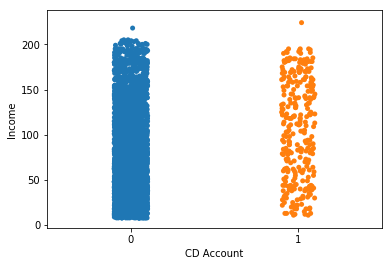

In [62]:
#visualizations-correlation between Income and CDAccount
sns.stripplot(x=col_list[11], y =col_list[3] ,data = Customers_df)

People in both CDAccount category have income ranging from 20 to 200.No correlation exists between CDAccount and income.

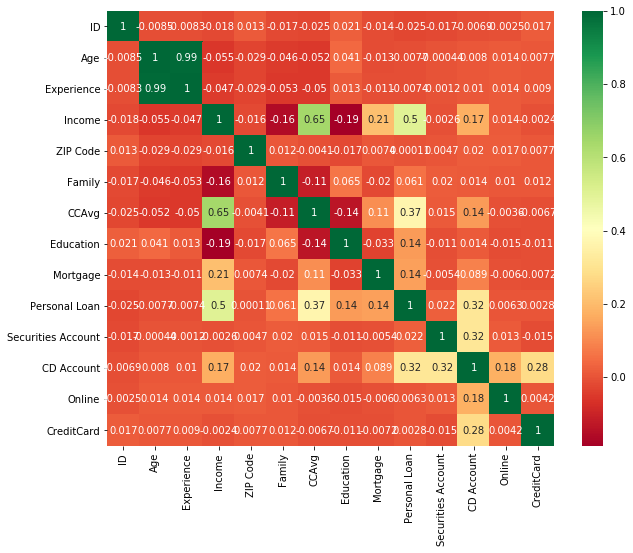

In [63]:
#check the correlation of features identified as having impact on ploan(Income,Family,Educaion,CCAvg,CDAccount)
corr=Customers_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='RdYlGn')

Income and CCAvg are having a slight positive correlation.
No other correlation exists between any other features.

In [112]:
condition9='CCAvg > 5.0 & Income>77'
#condition8
df_9=df[eval(Create_condition(condition9))]
final_value9=extract_data(df_9,condition9)
final_value9

,ploan = 0,ploan = 1,Ratio of conversion,Condition
0,208,138,39.884393,CCAvg > 5.0 & Income>77
